In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
df = pd.read_csv("/content/Iris.csv");
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Removing Id column
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Checking null values there are not
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.describe() #statistical data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


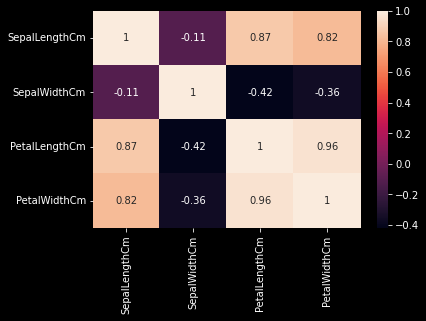

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

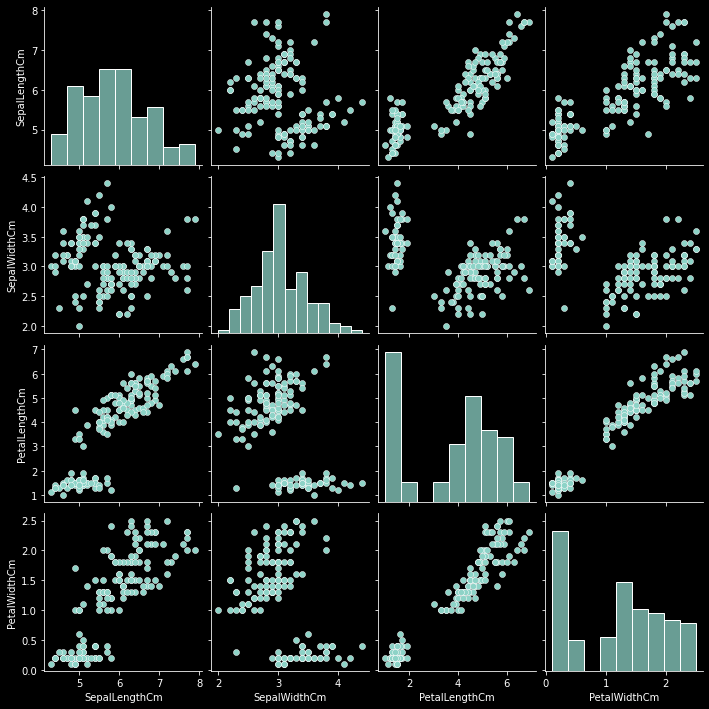

In [ ]:
# Visualising the Data set
plt.style.use("dark_background")
sns.pairplot(df)

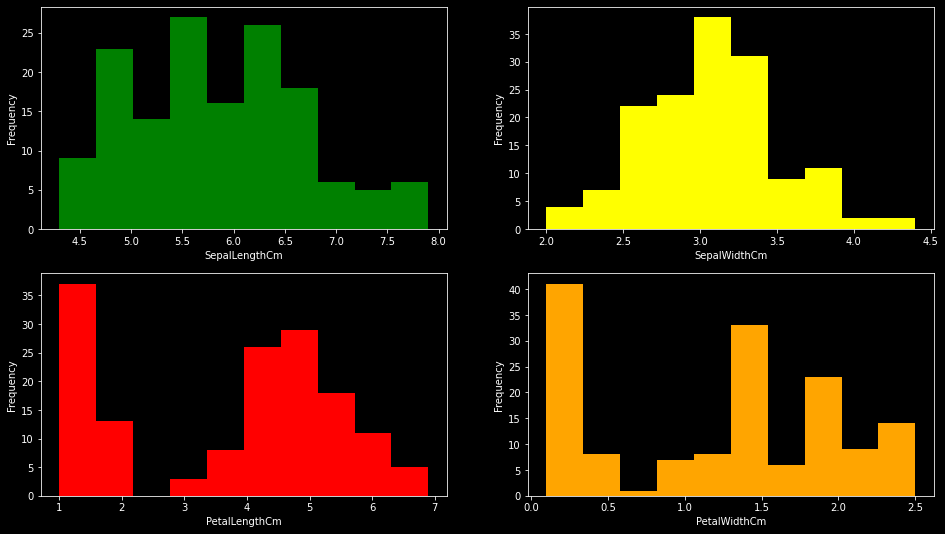

In [ ]:
fig = plt.figure(figsize=(16,9))
plt.style.use('dark_background')
plt.grid()
plt.subplot(2,2,1)
plt.xlabel('SepalLengthCm')
df['SepalLengthCm'].plot(kind='hist',color='g')
plt.subplot(2,2,2)
plt.xlabel('SepalWidthCm')
df['SepalWidthCm'].plot(kind='hist',color='yellow')
plt.subplot(2,2,3)
plt.xlabel('PetalLengthCm')
df['PetalLengthCm'].plot(kind='hist',color='red')
plt.subplot(2,2,4)
plt.xlabel('PetalWidthCm')
df['PetalWidthCm'].plot(kind='hist',color='orange')

In [ ]:
# importing libraries from scikit learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Organising data and splitting into x and y
X=df[['SepalLengthCm'	,'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [ ]:
la = LabelEncoder()
y = la.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Splitting data into train and test

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [ ]:
# Creating Model
dt=DecisionTreeClassifier(random_state=0)
cross_val_score(dt,x_train,y_train,cv=10).mean() #95%

0.95

In [ ]:
# Predicting

dt=dt.fit(x_train,y_train) #fitting data for training
dt.score(x_test,y_test)  #testing data

0.9666666666666667

In [ ]:
y = dt.predict(x_test)

# Accuracy

accuracy_score(y,y_test)

0.9666666666666667

In [ ]:
confusion_matrix(y_test,y)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [ ]:
classification_report(y_test,y)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.90      0.95        10\n           2       0.91      1.00      0.95        10\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [ ]:
df_traget=pd.DataFrame({'Actual':y_test,'Predicted':y}) #Checking
df_traget

,Actual,Predicted
0,0,0
1,2,2
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,2,2
9,1,1


In [ ]:
# Visualising Decision Tree

text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.15
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.15
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



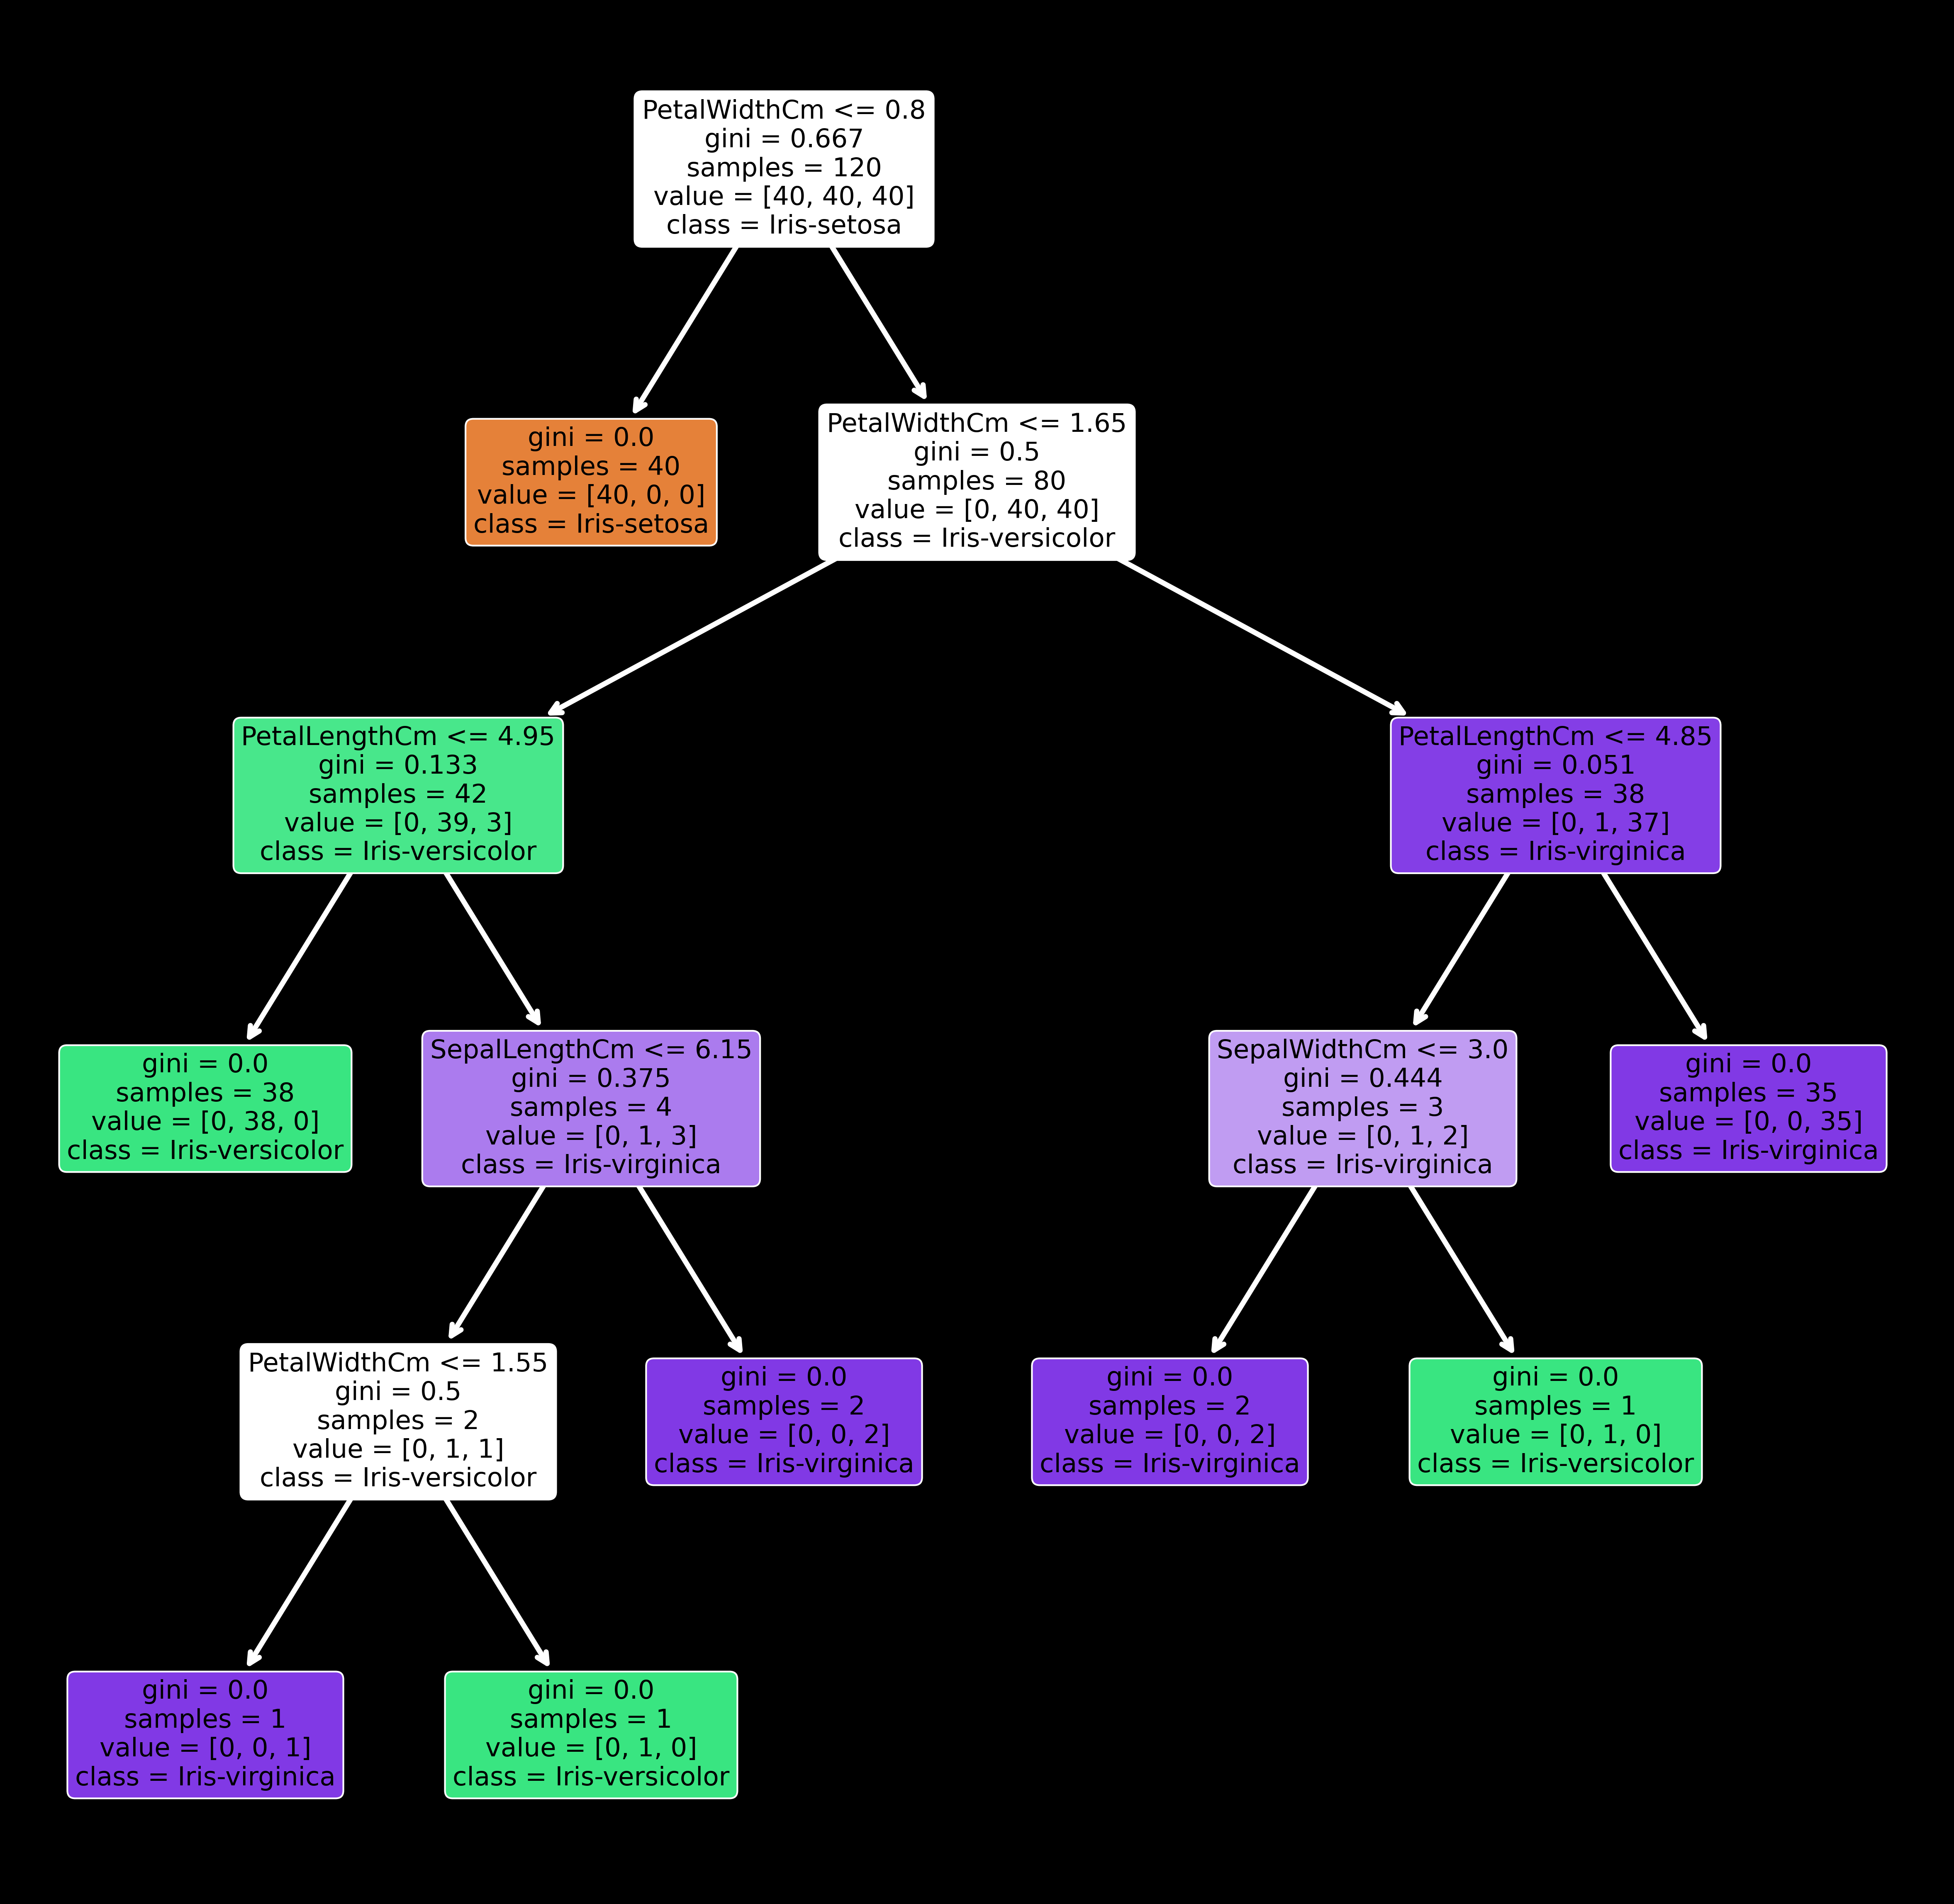

In [ ]:
import matplotlib
matplotlib.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(20, 20),dpi=300)
clf_tree = tree.plot_tree(dt,filled=True,rounded=True,
               feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],fontsize=15)
for o in clf_tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('white')
        arrow.set_linewidth(3)

plt.savefig('Iris_Dataset_Decision_Tree.png')
